<a href="https://colab.research.google.com/github/10100111/Display-of-HW1/blob/main/91_Pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание Pro

Макс 10 баллов

1) Постройте график функции sin(x) - x * 0.5 для x от -5 до 5.

2) Отобразите первые 5 шагов Momentum для начальной точки x = -4.

3) Модифицируйте Momentum таким образом, чтобы при подсчёте новых параметров к скорости добавлялась не производная в текущей точке x, а производная в точке x_ahead, которая находится как сумма текущей точки x и произведения текущей скорости с коэффициентом замедления. Более ничего менять не стоит. Полученный оптимизатор называется Nesterov momentum и, в отличие от обычного, использует информацию о позиции, где его фактически ещё не было, чтобы планировать своё дальнейшее перемещение.

4) Отобразите первые 5 шагов NesterovMomentum для начальной точки x = -4.

5) Сравните результаты для Momentum и NesterovMomentum, напишите свои выводы.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# 1) Постройте график функции sin(x) - x * 0.5 для x от -5 до 5.

In [2]:
x = np.linspace(-5, 5, 1000) # задаем точки х от -5 до 5

# Задаем функцию 
def loss_func(x):
  return np.sin(x) - x * 0.5

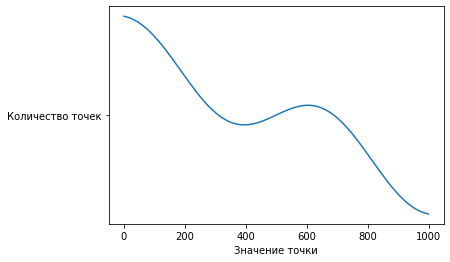

In [3]:
plt.plot(loss_func(x))
plt.xlabel("Значение точки")
plt.plot("Количество точек")
plt.show()

# 2) Отобразите первые 5 шагов Momentum для начальной точки x = -4.

In [4]:
# Объявляем класс Моментум
class Momentum:
  def __init__(self, slowdown_rate = 0.9): # инициализируем переменные
    self.v = 0              # скорость точки
    self.sd = slowdown_rate # коэффициент замедления

  def apply_grad(self, x, dx, learning_rate):
    self.v = self.v * self.sd - learning_rate * dx # скорость сначала уменьшется, а затем растет за счет градиента в данной точке
    return x + self.v

In [5]:
# Точка старта
initial_estimator = -4 

# Функция расчета производной
def derivative(func, value, step = 1):
  return (func(value + step) - func(value - step)) / (2 * step)

In [6]:
momentum_optimizer = Momentum() # создаем экземпляр класса

current_estimator = initial_estimator
estim_log = [current_estimator]
values_log = [loss_func(current_estimator)]

learning_steps = 5
learning_rate = 0.9

for i in range(learning_steps):
  derivative_val = derivative(loss_func, current_estimator)
  current_estimator = momentum_optimizer.apply_grad(current_estimator,
                                                    derivative_val,
                                                    learning_rate)
  estim_log.append(current_estimator)
  values_log.append(loss_func(current_estimator))


In [7]:
# Визуализация траектории
def draw_trajectory(x_values, y_values, estim_log, values_log):
  plt.plot(x_values, y_values) # изображаем кривую ошибки
  plt.plot(estim_log, values_log, marker="o") # изображаем значения, через которые прошел оптимизатор
  plt.legend(["Функция ошибки", " Путь оптимизатора"])
  plt.xlabel("Значение точки")
  plt.ylabel("Значение ошибки")
  plt.show()

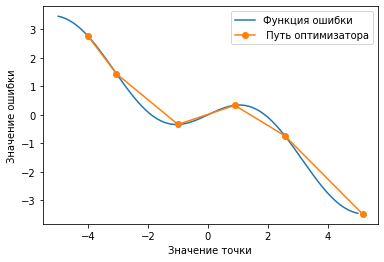

In [8]:
draw_trajectory(x, loss_func(x), estim_log, values_log)

# 3) Модифицируйте Momentum

Здесь при расчете скорости используется будущая точка , расчитываем ее. А после считаем производную этой будущей точки, т.к. она участвует в расчете скорости!!!

In [13]:
# Объявляем класс Моментум Нестерова
class Momentum_nesterov:
  def __init__(self, slowdown_rate = 0.9): # инициализируем переменные
    self.v = 0              # скорость точки
    self.sd = slowdown_rate # коэффициент замедления

  def apply_grad(self, x, dx, learning_rate):
    x_ahead = x + self.v * self.sd # расчитываем будущую точку, как описано в задании
    self.v = self.v * self.sd - learning_rate * derivative(loss_func, x_ahead) # берем градиент в будущей точке
    return x + self.v

In [14]:
momentum_optimizer = Momentum_nesterov() # создаем экземпляр класса

current_estimator = initial_estimator
estim_log = [current_estimator]
values_log = [loss_func(current_estimator)]

learning_steps = 5
learning_rate = 0.9

for i in range(learning_steps):
  derivative_val = derivative(loss_func, current_estimator)
  current_estimator = momentum_optimizer.apply_grad(current_estimator,
                                                    derivative_val,
                                                    learning_rate)
  estim_log.append(current_estimator)
  values_log.append(loss_func(current_estimator))

# 4) Отобразите первые 5 шагов NesterovMomentum для начальной точки x = -4.

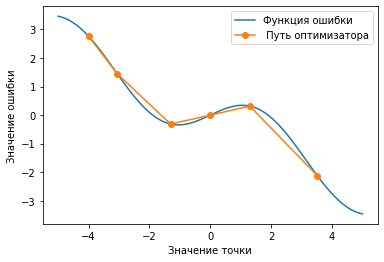

In [15]:
draw_trajectory(x, loss_func(x), estim_log, values_log)

# Выводы

Нестеров моментум траектория проходит ближе к графику лосс функции, это значит он работает более точно. В локальном минимуме размер шага поменьше, а дальше на спуске вилдим снова длинный шаг, это говорит о большей эффективности данного подхода. 
